# DFA: Basics, and Designing Them (Ch 4)

In [43]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_DFA    import *
from jove.LangDef    import *  # for testing DFA actions
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# What are DFA?

DFA are mechanisms to specify a simple yet powerful family of languages called
Regular Languages. Below, we define Regular Languages. Then we present how DFA
help define regular languages in two ways: One via Graphs, and the other via
Symbol and String Transition Functions.

In [44]:
i_jDivisibleByThree= md2mc('''DFA

IF : a -> S_ad  !! d denotes no more accepting either a or b
IF : b -> S_db  !! no more accepting a's (0 a % 3 = 0)

Sab : a -> Saab  !! Saba functionally the same as Saab, keep lexicographic order
Sab : b -> Sabb

Saab : a -> S_db  !! d denotes no more accepting a's
Saab : b -> Saabb

Sabb : a -> Saabb  !! Sabba functionally the same as Saabb
Sabb : b -> S_ad   !! d denotes no more accepting b's

S_db : a -> Sab   !! a % 3 was 0, now it is 1, along with 1 b (Sab)
S_db : b -> S_dbb

S_ad : a -> S_aad
S_ad : b -> Sab  !! b % 3 was 0, now it is 1, along with 1 a (Sab)

Saabb : a -> S_dbb  !! pattern continues
Saabb : b -> S_aad

S_aad : a -> IF
S_aad : b -> Saab

S_dbb : a -> Sabb
S_dbb : b -> IF

''')

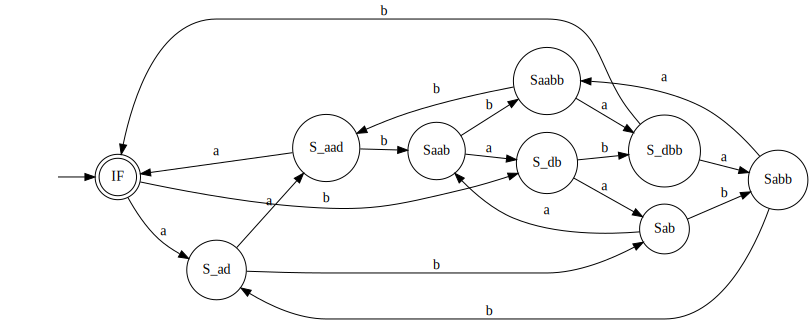

In [45]:
dotObj_dfa(i_jDivisibleByThree)

## From Languages to Regular Languages

We will now study __regular languages__. 

L is a regular language if L has a DFA. 

L is a regular language if there is a DFA D such that D accepts *all* and *only* those strings in L.

## DFA as Graphs: Define Regular Languages

DFA drawings are graphs. A string w is in a DFA D's language if there is a path from the initial state to *a* final state of D labeled by w.

## DFA as Symbol and String Transition Functions

A DFA is a quintuple $(Q, \Sigma, \delta, q_0, F)$. Its Python encoding looks as below.

In [4]:
Fig34 = {
 'Q': {'A', 'F', 'I'},
 'Sigma': {'0', '1'},
 'Delta': {('A', '0'): 'I',
  ('A', '1'): 'I',
  ('F', '0'): 'I',
  ('F', '1'): 'I',
  ('I', '0'): 'A',
  ('I', '1'): 'F'},
 'q0': 'I',
 'F': {'F'}
}

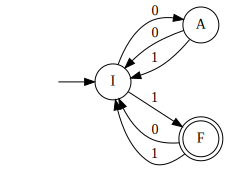

In [5]:
dotObj_dfa(Fig34)

## A prettier diagram is obtained by fusing edges

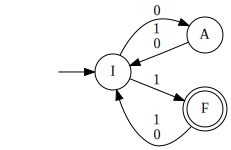

In [6]:
dotObj_dfa(Fig34, FuseEdges=True)

# The same DFA in automd (Jove's markdown)

Study Overview_Of_CS3100_Fall2020/ and its contents to fully learn how to define a DFA via a markdown.
You can study the animation panel which also explains the markdown syntax fully.


### **Assignment 2 **

Language  : input set {a, b} such that every string accepted
ends with either 'aa' or 'bb'


In [73]:
from jove.JoveEditor import *
JoveEditor(examples=True)
display(HTML('<link rel=\"stylesheet\" href=\"//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css\"/>'))

In [74]:
fig = md2mc('''  
DFA            
I : a     -> Q1 !! Go to Q1 seeking b
I : b     -> Q3 !! Go to Q1 seeking a
Q1 : b    -> Q3 !! Advancing to Q3 from Q1 for seeking b
Q3 : a    -> Q1 !! Advancing to Q1 from Q3 for seeking a
Q1 : a    -> FQ2 !! To satisfy ending condition for seeking 'aa'
Q3 : b    -> FQ4 !! To satisfy ending condition for seeking 'bb'
FQ2 : b -> Q3 !! To remove 'ab' from accepting 
FQ2 : a -> FQ2 !! For accepting condition 'aa' at ending
FQ4 : a -> Q1 !! To remove 'ba' from accepting
FQ4 : b -> FQ4 !! For accepting condition 'bb' at ending
''')

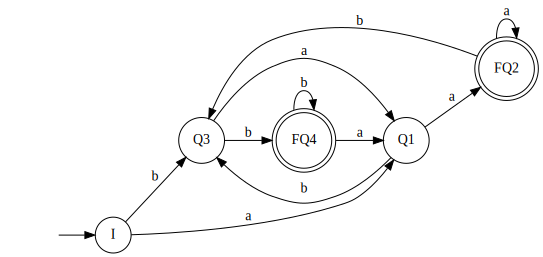

In [75]:
dotObj_dfa(fig)

In [76]:
step_dfa(fig, 'Q3', 'a')

'Q1'

In [77]:
step_dfa(fig, 'FQ4', 'b')

'FQ4'

In [78]:
run_dfa(fig, 'bbaababababababa')

'Q1'

In [79]:
run_dfa(fig, 'bbaabababababaaa')

'FQ2'

In [80]:
run_dfa(fig, 'bbaababababababb')

'FQ4'